## Importing Modules

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Read Data

In [35]:
df = pd.read_csv('creditcard.csv')

In [36]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Data Cleaning

In [38]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

1081


In [39]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

<Axes: title={'center': 'Class'}>

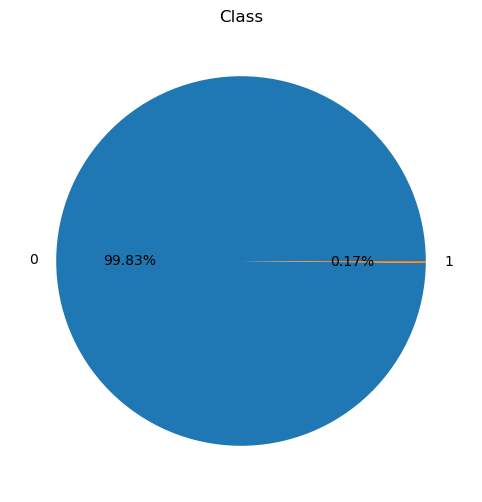

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,6))
df['Class'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Class')

In [42]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

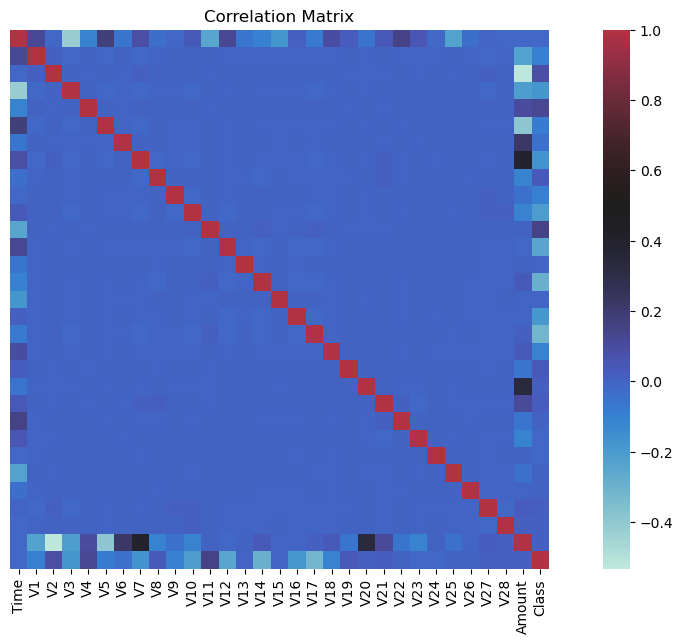

In [24]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(df.corr(), square=True, center=0.5, yticklabels=False).set_title('Correlation Matrix')

## Spliting the data

In [43]:
inputs = df.drop("Class", axis="columns")
targets = df.Class
x_train, x_test, y_train, y_test = train_test_split( inputs, targets, test_size=0.2, random_state=10)

In [44]:
print("y test value counts:\n" ,y_test.value_counts(),"\n\n")
print("y train value counts:\n" ,y_train.value_counts())

y test value counts:
 0    56661
1       85
Name: Class, dtype: int64 


y train value counts:
 0    226592
1       388
Name: Class, dtype: int64


## Logistic Regression

In [45]:
lg=LogisticRegression(max_iter = 10000)
lg.fit(x_train,y_train)
y_predicted = lg.predict(x_test)
accuracy = lg.score(x_test, y_test)

print(classification_report(y_test,y_predicted))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56661
           1       0.79      0.53      0.63        85

    accuracy                           1.00     56746
   macro avg       0.89      0.76      0.82     56746
weighted avg       1.00      1.00      1.00     56746

0.9990836358509851


## Confusion Matrix

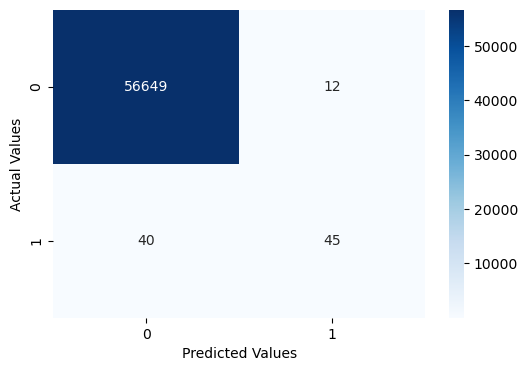

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix, annot=True, cmap='Blues' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()